## Script 4, Saloni Khandelwal

#### (Sentiment Analysis - Customized, Visualized Over Time)

### Sentiment Analysis: Explicitly Customized
##### Naive Bates Model Trained on Yelp Reviews + Fine Tuned on Annotated Dataset

In [ ]:
pip install eli5

In [ ]:
pip install wordcloud

In [ ]:
import sklearn
import pandas as pd

import wordcloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics
import numpy as np

import eli5

In [ ]:
directory = 'https://storage.googleapis.com/msca-bdp-data-open/yelp/'
fileName = 'yelp_train_sentiment.json'

path = directory + fileName

In [ ]:
%%time

yelp = pd.read_json(path, orient='records', lines=True)
yelp.shape

CPU times: user 891 ms, sys: 467 ms, total: 1.36 s
Wall time: 23.5 s


(255717, 3)

In [ ]:
pd.set_option('display.max_colwidth', 200)

In [ ]:
yelp.head(15)

,text,label,lang
0,"I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sa...",1,en
1,I love the classes at this gym. Zumba and. Radio Hip Hop are my favorite. This is such a great fun and I love that it is so reasonably priced!,1,en
2,The tables and floor were dirty. I was the only customer on a Saturday nite and the person working the counter ignored me I had a corned beef sandwich. I took three bites and threw it in the trash,0,en
3,"I had an oil change at the 15515 N Scottsdale Road location. When the car was delivered to me, there were two engine warning lights on that had not been on when I drove the car in. The technicia...",0,en
4,The absolute WORST apartment complex I have ever lived in. Moved here from out of state. Hoped to find a decently priced apartment until I got myself settled in. Wow this place has been trash. Lan...,0,en
5,"I saw Big Jim's on Diners, Drive-ins and Dives. Went there when in Pittsburgh with my son visiting Pitt, had a great lunch. \nMy son went to Pitt and I have been back several times. The food is ve...",1,en
6,"THE TACOS. I got pastor, asada, and chorizo. Authentic. Delicious. Nice topping bar with cilantro, limes, onions and sauces. The market itself is cool to walk around and get unique items as well.",1,en
7,After being a regular at Veggie House i thought it be cool to try Chef Kenny's. We went there a couple times and usually had a great experience until most recently we ordered spicy crispy beef and...,0,en
8,With many eateries to chose from on queen street we decided to give this place a try seeing how there is usually a line up outside....after waiting 20 minutes outside we were seated at an extremel...,0,en
9,DO NOT USE THESE PEOPLE!!!!! I wish I would have looked on here first as now I can to attest to the fact that this company is a total scam!!! Their website looks so professional and said family b...,0,en


In [ ]:
# define X and y
X = yelp['text']
y = yelp['label']

print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

X Shape: (255717,)
y Shape: (255717,)


In [ ]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(f"Training records, X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"Testing records, X_test: {X_test.shape} y_test: {y_test.shape}")

Training records, X_train: (191787,) y_train: (191787,)
Testing records, X_test: (63930,) y_test: (63930,)


In [ ]:
vect = CountVectorizer()

# vect = CountVectorizer(lowercase=False, stop_words='english',
#                                   max_df=0.8, min_df=0.2, max_features=10000, ngram_range=(1,3))

vect = CountVectorizer(lowercase=False, stop_words='english', ngram_range=(1,3))

In [ ]:
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

In [ ]:
%time
nb.fit(vect.fit_transform(X_train), y_train)

CPU times: user 3 µs, sys: 3 µs, total: 6 µs
Wall time: 10 µs


MultinomialNB()

In [ ]:
# make class predictions
y_pred = nb.predict(vect.transform(X_test))

In [ ]:
# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.1f}%")

Test Accuracy: 94.8%


In [ ]:
# calculate precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     32217
           1       0.97      0.92      0.95     31713

    accuracy                           0.95     63930
   macro avg       0.95      0.95      0.95     63930
weighted avg       0.95      0.95      0.95     63930



In [ ]:
df = pd.read_parquet('filtered_news.parquet')
df.head()

,url,date,language,title,text,cleaned_text,important_words,tokens,topic
0,http://en.people.cn/n3/2021/0318/c90000-9830122.html,2021-03-18,en,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,\n\nArtificial intelligence improves parking efficiency in Chinese cities - People's Daily Online\n\nHome\nChina Politics\nForeign Affairs\nOpinions\nVideo: We Are China\nBusiness\nMilitary\nWorld...,"Some urban areas of the city started to use ETC system for roadside parking spaces since July 1, 2019. As the city further deepens its roadside parking reform, the ETC system has almost covered al...",urban areas city started use etc system roadside parking spaces since july 1 2019 city deepens roadside parking reform etc system almost covered roadside parking spaces city proportion vehicles pa...,"[urban, areas, city, started, use, etc, system, roadside, parking, spaces, since, july, 1, 2019, city, deepens, roadside, parking, reform, etc, system, almost, covered, roadside, parking, spaces, ...",0
1,http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/,2020-02-27,en,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament,"\nChildren With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament\n \n\nSkip to content\n\t\t\tThursday, February 27, 2020\t\t\n\nLatest:\n\n\n...","Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament Thursday, February 27, 2020 Latest: Mansplaining in conferences: How can we get...",children autism saw learning social skills boosted playing ai robot news parliament thursday february 27 2020 latest mansplaining conferences get forestall learn noticed seven youngsters gentle av...,"[children, autism, saw, learning, social, skills, boosted, playing, ai, robot, news, parliament, thursday, february, 27, 2020, latest, mansplaining, conferences, get, forestall, learn, noticed, se...",1
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek","\n\nForget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek\nHome\nAbout us\nBack issues / E-book / PDF\nEMP Handbook\nSubscribe\...",The world entered a new era of accelerated transformation in the last eighteen months that will continue to evolve and press forward for years to come. Most businesses are playing catch-up trying ...,world entered new era accelerated transformation last eighteen months continue evolve press forward years come businesses playing catchup trying make sense new timeline ten years set aside careful...,"[world, entered, new, era, accelerated, transformation, last, eighteen, months, continue, evolve, press, forward, years, come, businesses, playing, catchup, trying, make, sense, new, timeline, ten...",0
3,http://www.homeoffice.consumerelectronicsnet.com/strategy-analytics-71-of-smartphones-sold-globally-in-2021-will-be-ai-powered/,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net,\n\nStrategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net\n \nSkip to content\n\nConsumer Electronics Net\n\nPrimary Menu\n\nConsumer Electroni...,"AI is used in various functions inside smartphones such as intelligent power optimization, imaging, virtual assistants, and to enhance device performance. The report highlights the fact that AI ha...",ai used various functions inside smartphones intelligent power optimization imaging virtual assistants enhance device performance report highlights fact ai become important technology modern smart...,"[ai, used, various, functions, inside, smartpho

In [ ]:
df.shape

(136927, 9)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

X_test_news = df['important_words']
X_test_vect = vect.transform(X_test_news)
y_pred = nb.predict(X_test_vect)
df['predicted_sentiment_yelp'] = y_pred

In [ ]:
df.head()

,url,date,language,title,text,cleaned_text,important_words,tokens,topic,predicted_sentiment_yelp
0,http://en.people.cn/n3/2021/0318/c90000-9830122.html,2021-03-18,en,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,\n\nArtificial intelligence improves parking efficiency in Chinese cities - People's Daily Online\n\nHome\nChina Politics\nForeign Affairs\nOpinions\nVideo: We Are China\nBusiness\nMilitary\nWorld...,"Some urban areas of the city started to use ETC system for roadside parking spaces since July 1, 2019. As the city further deepens its roadside parking reform, the ETC system has almost covered al...",urban areas city started use etc system roadside parking spaces since july 1 2019 city deepens roadside parking reform etc system almost covered roadside parking spaces city proportion vehicles pa...,"[urban, areas, city, started, use, etc, system, roadside, parking, spaces, since, july, 1, 2019, city, deepens, roadside, parking, reform, etc, system, almost, covered, roadside, parking, spaces, ...",0,0
1,http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/,2020-02-27,en,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament,"\nChildren With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament\n \n\nSkip to content\n\t\t\tThursday, February 27, 2020\t\t\n\nLatest:\n\n\n...","Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament Thursday, February 27, 2020 Latest: Mansplaining in conferences: How can we get...",children autism saw learning social skills boosted playing ai robot news parliament thursday february 27 2020 latest mansplaining conferences get forestall learn noticed seven youngsters gentle av...,"[children, autism, saw, learning, social, skills, boosted, playing, ai, robot, news, parliament, thursday, february, 27, 2020, latest, mansplaining, conferences, get, forestall, learn, noticed, se...",1,0
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek","\n\nForget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek\nHome\nAbout us\nBack issues / E-book / PDF\nEMP Handbook\nSubscribe\...",The world entered a new era of accelerated transformation in the last eighteen months that will continue to evolve and press forward for years to come. Most businesses are playing catch-up trying ...,world entered new era accelerated transformation last eighteen months continue evolve press forward years come businesses playing catchup trying make sense new timeline ten years set aside careful...,"[world, entered, new, era, accelerated, transformation, last, eighteen, months, continue, evolve, press, forward, years, come, businesses, playing, catchup, trying, make, sense, new, timeline, ten...",0,0
3,http://www.homeoffice.consumerelectronicsnet.com/strategy-analytics-71-of-smartphones-sold-globally-in-2021-will-be-ai-powered/,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net,\n\nStrategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net\n \nSkip to content\n\nConsumer Electronics Net\n\nPrimary Menu\n\nConsumer Electroni...,"AI is used in various functions inside smartphones such as intelligent power optimization, imaging, virtual assistants, and to enhance device performance. The report highlights the fact that AI ha...",ai used various functions inside smartphones intelligent power optimization imaging virtual assistants enhance device performance report highlights fact ai become important technology modern smart...,"[ai, used, vario

In [ ]:
df.shape

(136927, 10)

In [ ]:
df['predicted_sentiment_yelp'].value_counts()

predicted_sentiment_yelp
0    131199
1      5728
Name: count, dtype: int64

In [ ]:
topic_sentiment_distribution = df.groupby('topic')['predicted_sentiment_yelp'].value_counts(normalize=True)

for topic in df['topic'].unique():
    topic_data = df[df['topic'] == topic]

    sentiment_distribution = topic_sentiment_distribution[topic]

    print(f"Topic: {topic}")
    print(sentiment_distribution)
    print()

Topic: 0
predicted_sentiment_yelp
0    0.934513
1    0.065487
Name: proportion, dtype: float64

Topic: 1
predicted_sentiment_yelp
0    0.964194
1    0.035806
Name: proportion, dtype: float64

Topic: 5
predicted_sentiment_yelp
0    0.965787
1    0.034213
Name: proportion, dtype: float64

Topic: 2
predicted_sentiment_yelp
0    0.9861
1    0.0139
Name: proportion, dtype: float64

Topic: 8
predicted_sentiment_yelp
0    0.979695
1    0.020305
Name: proportion, dtype: float64

Topic: 7
predicted_sentiment_yelp
0    0.971328
1    0.028672
Name: proportion, dtype: float64

Topic: 9
predicted_sentiment_yelp
0    0.972943
1    0.027057
Name: proportion, dtype: float64

Topic: 4
predicted_sentiment_yelp
0    0.975144
1    0.024856
Name: proportion, dtype: float64

Topic: 6
predicted_sentiment_yelp
0    0.983711
1    0.016289
Name: proportion, dtype: float64



In [ ]:
element = 0
clf = nb

text = X_test_news.iloc[element]
prediction = np.where(clf.predict(vect.transform([text])) < 1, "Negative", "Positive").tolist()[element]
print('Text: >>> ' + text + '\n' + 'Sentiment: >>> ' + prediction)

Text: >>> urban areas city started use etc system roadside parking spaces since july 1 2019 city deepens roadside parking reform etc system almost covered roadside parking spaces city proportion vehicles parked roads using system exceeding 90 percent aiempowered system drivers park vehicles parking spots roadside pay parking charge via mobile phones drive away road used full cars even normal lanes occupied could hardly move bit morning evening commute time recalled citizen surnamed wang lives chaoyang district beijing since summer 2019 roadside etc devices installed cars parked designated parking spots roadside road seems brighter wider wang said smart roadside etc system aipark sky eye adopted beijing developed operated maintained aipark beijingbased leading smart parking solution provider companys intelligent system brought full play advantages ai technologies effectively addressed shortage parking spaces problem irregular parking cities system therefore listed among countrys innovat

In [ ]:
prediction

'Negative'

In [ ]:
df.shape

(136927, 10)

In [ ]:
clf = nb
df['predicted_sentiment_YELP2'] = clf.predict(vect.transform(X_test_news))
df['predicted_sentiment_YELP2'] = np.where(df['predicted_sentiment_YELP2'] < 1, "0", "1")

In [ ]:
df.head()

,url,date,language,title,text,cleaned_text,important_words,tokens,topic,predicted_sentiment_yelp,predicted_sentiment_YELP2
0,http://en.people.cn/n3/2021/0318/c90000-9830122.html,2021-03-18,en,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,\n\nArtificial intelligence improves parking efficiency in Chinese cities - People's Daily Online\n\nHome\nChina Politics\nForeign Affairs\nOpinions\nVideo: We Are China\nBusiness\nMilitary\nWorld...,"Some urban areas of the city started to use ETC system for roadside parking spaces since July 1, 2019. As the city further deepens its roadside parking reform, the ETC system has almost covered al...",urban areas city started use etc system roadside parking spaces since july 1 2019 city deepens roadside parking reform etc system almost covered roadside parking spaces city proportion vehicles pa...,"[urban, areas, city, started, use, etc, system, roadside, parking, spaces, since, july, 1, 2019, city, deepens, roadside, parking, reform, etc, system, almost, covered, roadside, parking, spaces, ...",0,0,0
1,http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/,2020-02-27,en,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament,"\nChildren With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament\n \n\nSkip to content\n\t\t\tThursday, February 27, 2020\t\t\n\nLatest:\n\n\n...","Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament Thursday, February 27, 2020 Latest: Mansplaining in conferences: How can we get...",children autism saw learning social skills boosted playing ai robot news parliament thursday february 27 2020 latest mansplaining conferences get forestall learn noticed seven youngsters gentle av...,"[children, autism, saw, learning, social, skills, boosted, playing, ai, robot, news, parliament, thursday, february, 27, 2020, latest, mansplaining, conferences, get, forestall, learn, noticed, se...",1,0,0
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek","\n\nForget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek\nHome\nAbout us\nBack issues / E-book / PDF\nEMP Handbook\nSubscribe\...",The world entered a new era of accelerated transformation in the last eighteen months that will continue to evolve and press forward for years to come. Most businesses are playing catch-up trying ...,world entered new era accelerated transformation last eighteen months continue evolve press forward years come businesses playing catchup trying make sense new timeline ten years set aside careful...,"[world, entered, new, era, accelerated, transformation, last, eighteen, months, continue, evolve, press, forward, years, come, businesses, playing, catchup, trying, make, sense, new, timeline, ten...",0,0,0
3,http://www.homeoffice.consumerelectronicsnet.com/strategy-analytics-71-of-smartphones-sold-globally-in-2021-will-be-ai-powered/,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net,\n\nStrategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net\n \nSkip to content\n\nConsumer Electronics Net\n\nPrimary Menu\n\nConsumer Electroni...,"AI is used in various functions inside smartphones such as intelligent power optimization, imaging, virtual assistants, and to enhance device performance. The report highlights the fact that AI ha...",ai used various functions inside smartphones intelligent power optimization imaging virtual assistants enhance device performance report highlights fact ai become important technology m

In [ ]:
df['predicted_sentiment_YELP2'].value_counts()

predicted_sentiment_YELP2
0    131199
1      5728
Name: count, dtype: int64

In [ ]:
df[['predicted_sentiment_yelp', 'predicted_sentiment_YELP2']].nunique().gt(1).any()

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136927 entries, 0 to 200331
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   url                        136927 non-null  object
 1   date                       136927 non-null  object
 2   language                   136927 non-null  object
 3   title                      136927 non-null  object
 4   text                       136927 non-null  object
 5   cleaned_text               136927 non-null  object
 6   important_words            136927 non-null  object
 7   tokens                     136927 non-null  object
 8   topic                      136927 non-null  int64 
 9   predicted_sentiment_yelp   136927 non-null  int64 
 10  predicted_sentiment_YELP2  136927 non-null  object
dtypes: int64(2), object(9)
memory usage: 12.5+ MB


In [ ]:
df['predicted_sentiment_YELP2'] = df['predicted_sentiment_YELP2'].astype(int)

### Fine Tuning

#### Manual Labeling

In [ ]:
df['new_sentiment_label'] = ''

from sklearn.utils import shuffle
shuffled_df = df.sample(frac=1).reset_index(drop=True)

num_instances = 50

In [ ]:
for index, row in shuffled_df.iterrows():
    if index >= num_instances:
        break

    text = row['text']

    sentiment = input(f"Data instance {index+1}/{num_instances}:\n{text}\nSentiment (positive/negative): ")

    shuffled_df.at[index, 'new_sentiment_label'] = sentiment.lower()

Data instance 1/50:


Zillow expands and improves AI - GuruFocus.com


  Get Your 7-Day Free Trial! 
Start Now!
     Login  
Free Sign-up
 
Login
 
7-Day Free Trial
   Home   
Homepage

Membership Levels

About Us

General Discussion

Complete Stock List
 
The book
 
Podcast
 
Membership Data Coverage
 
Founder's Message
 
Free Trial
Screeners   
GuruFocus Screeners
 
All-In-One Screener
   
Dividend Income Portfolio
   
Ben Graham Lost Formula
   
Canadian Faster Growers
   
CEO Buys
   
CEO Buys after Price Drop > 20%
   
Dividend Growth Portfolio
   
Dividend Income Portfolio
   
Fast Growers
   
Hedge Fund Guru Top 10 Aggregated
   
High Quality
   
High Quality Low Capex w ROE ROC min
   
High Quality & Low Capex
   
High Yield Insider Buys
   
Historical High Dividend Yields
   
International Gurus' Top Holdings
   
James Montier Short Screen
   
Margin Decliners
   
Mega Caps
   
Peter Lynch & Warren Buffett
   
Peter Lynch Growth w Lower Valuation
   
Peter Lynch S&L Traded Bel

#### Fine Tuning Model

In [ ]:
shuffled_df[(shuffled_df['new_sentiment_label'].notnull()) & (shuffled_df['new_sentiment_label'] != '')]

,url,date,language,title,text,cleaned_text,important_words,tokens,topic,predicted_sentiment_yelp,predicted_sentiment_YELP2,new_sentiment_label
0,https://www.gurufocus.com/news/1801866/zillow-expands-and-improves-aipowered-interactive-tours-helping-home-shoppers-move-with-speed-and-confidence,2022-07-05,en,Zillow expands and improves AI - GuruFocus.com,\n\nZillow expands and improves AI - GuruFocus.com\n\n\n Get Your 7-Day Free Trial! \nStart Now!\n Login \nFree Sign-up\n \nLogin\n \n7-Day Free Trial\n Home \nHomepage\n\nMembership Lev...,"Zillow expands and improves AI - GuruFocus.com Get Your 7-Day Free Trial! At a time when so many people are rethinking where and how they want to live, home shoppers in major markets across the co...",zillow expands improves ai gurufocuscom get 7day free trial time many people rethinking want live home shoppers major markets across country get deeper sense home ever without stepping foot inside...,"[zillow, expands, improves, ai, gurufocuscom, get, 7day, free, trial, time, many, people, rethinking, want, live, home, shoppers, major, markets, across, country, get, deeper, sense, home, ever, w...",1,0,0,p
1,https://finance.yahoo.com/news/google-monopoly-delayed-innovations-chatgpt-174519410.html,2023-04-13,en,"Google’s Monopoly Delayed Innovations Like ChatGPT, DOJ Says","Google’s Monopoly Delayed Innovations Like ChatGPT, DOJ Says HOME MAIL NEWS FINANCE SPORTS ENTERTAINMENT LIFE SEARCH SHOPPING YAHOO PLUS MORE... Yahoo F...",“What has been going on for the past 12 years is Google has been maintaining its monopoly. Would we have seen ChatGPT six years earlier? Would we see five other competitors competing for search? T...,going past 12 years google maintaining monopoly would seen chatgpt six years earlier would see five competitors competing search questions none us answergoogle asked mehta throw two antitrust case...,"[going, past, 12, years, google, maintaining, monopoly, would, seen, chatgpt, six, years, earlier, would, see, five, competitors, competing, search, questions, none, us, answergoogle, asked, mehta...",1,0,0,p
2,https://thearabianpost.com/vinai-ai-day-returns-in-2022-themed-empower-the-future/,2022-08-23,en,VinAI AI day returns in 2022 themed ‘Empower The Future’ | Arabian Post,\n\nVinAI AI day returns in 2022 themed ‘Empower The Future’ | Arabian Post\n\n \n⌂\nWIRE\nFeatured\nBusiness\nMarkets\nME\nAsia\n Asian News by Media-Outreach India Specials \nColumns\nBiz T...,⌂ WIRE Featured Business Markets ME Asia Asian News by Media-Outreach India Specials Columns Biz Tech … Authors Vishnu Raja K Raveendran Matein Khalid Sushil Kutty Saifur Rahman Nitten Nair Buzz M...,wire featured business markets asia asian news mediaoutreach india specials columns biz tech authors vishnu raja k raveendran matein khalid sushil kutty saifur rahman nitten nair buzz market data ...,"[wire, featured, business, markets, asia, asian, news, mediaoutreach, india, specials, columns, biz, tech, authors, vishnu, raja, k, raveendran, matein, khalid, sushil, kutty, saifur, rahman, nitt...",0,0,0,p
3,https://www.lep.co.uk/read-this/chatgpt-what-is-the-ai-chatbot-how-to-use-it-are-the-answers-always-correct-and-where-is-it-banned-4015902,2023-02-06,en,ChatGPT: How to use AI chatbot | Lancashire Evening Post,ChatGPT: How to use AI chatbot | Lancashire Evening Post \n News you can trust since 1886\n\nSign in\n\n Welcome backEdit Account-Sign OutMy AccountSign OutSubscribeNationalWorldT...,"But what exactly is it and how do you use it?According to a popular tech website, Gizmodo, ChatGPT is an artificial intelligence programme that enables users to generate unique text. You may ask q...",exactly use itaccording popular tech website gizmodo chatgpt artificial intelligence programme enables users generate unique text may ask questions offer creative cues use develop wide range conte...,"[exactly, use, itaccording, popular, tech, website, gizmodo, chatgpt, artificial, intelligence, programme, enables, users, generate, 

In [ ]:
sentiment_df =  shuffled_df[(shuffled_df['new_sentiment_label'].notnull())
                            & (shuffled_df['new_sentiment_label'] != '')]
len(sentiment_df)

50

In [ ]:
fine_tuning_reviews = sentiment_df['important_words']
fine_tuning_sentiments = sentiment_df['new_sentiment_label']

In [ ]:
fine_tuning_reviews = vect.transform(fine_tuning_reviews)

In [ ]:
nb.fit(fine_tuning_reviews, fine_tuning_sentiments)

MultinomialNB()

In [ ]:
y_pred_test = nb.predict(fine_tuning_reviews)
sentiment_df['predicted_sentiment_yelp_new'] = y_pred_test

/var/folders/1q/cr3dj0m115vf89fcxv59dk7r0000gn/T/ipykernel_92871/115116416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['predicted_sentiment_yelp_new'] = y_pred_test


In [ ]:
#sentiment_df

In [ ]:
X_test_news = df['important_words']
X_test_vect = vect.transform(X_test_news)
y_pred_new = nb.predict(X_test_vect)
df['predicted_sentiment_yelp_new'] = y_pred_new

In [ ]:
df

,url,date,language,title,text,cleaned_text,important_words,tokens,topic,predicted_sentiment_yelp,predicted_sentiment_YELP2,new_sentiment_label,predicted_sentiment_yelp_new
0,http://en.people.cn/n3/2021/0318/c90000-9830122.html,2021-03-18,en,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,\n\nArtificial intelligence improves parking efficiency in Chinese cities - People's Daily Online\n\nHome\nChina Politics\nForeign Affairs\nOpinions\nVideo: We Are China\nBusiness\nMilitary\nWorld...,"Some urban areas of the city started to use ETC system for roadside parking spaces since July 1, 2019. As the city further deepens its roadside parking reform, the ETC system has almost covered al...",urban areas city started use etc system roadside parking spaces since july 1 2019 city deepens roadside parking reform etc system almost covered roadside parking spaces city proportion vehicles pa...,"[urban, areas, city, started, use, etc, system, roadside, parking, spaces, since, july, 1, 2019, city, deepens, roadside, parking, reform, etc, system, almost, covered, roadside, parking, spaces, ...",0,0,0,,p
1,http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/,2020-02-27,en,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament,"\nChildren With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament\n \n\nSkip to content\n\t\t\tThursday, February 27, 2020\t\t\n\nLatest:\n\n\n...","Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament Thursday, February 27, 2020 Latest: Mansplaining in conferences: How can we get...",children autism saw learning social skills boosted playing ai robot news parliament thursday february 27 2020 latest mansplaining conferences get forestall learn noticed seven youngsters gentle av...,"[children, autism, saw, learning, social, skills, boosted, playing, ai, robot, news, parliament, thursday, february, 27, 2020, latest, mansplaining, conferences, get, forestall, learn, noticed, se...",1,0,0,,n
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek","\n\nForget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek\nHome\nAbout us\nBack issues / E-book / PDF\nEMP Handbook\nSubscribe\...",The world entered a new era of accelerated transformation in the last eighteen months that will continue to evolve and press forward for years to come. Most businesses are playing catch-up trying ...,world entered new era accelerated transformation last eighteen months continue evolve press forward years come businesses playing catchup trying make sense new timeline ten years set aside careful...,"[world, entered, new, era, accelerated, transformation, last, eighteen, months, continue, evolve, press, forward, years, come, businesses, playing, catchup, trying, make, sense, new, timeline, ten...",0,0,0,,p
3,http://www.homeoffice.consumerelectronicsnet.com/strategy-analytics-71-of-smartphones-sold-globally-in-2021-will-be-ai-powered/,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net,\n\nStrategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net\n \nSkip to content\n\nConsumer Electronics Net\n\nPrimary Menu\n\nConsumer Electroni...,"AI is used in various functions inside smartphones such as intelligent power optimization, imaging, virtual assistants, and to enhance device performance. The report highlights the fact that AI ha...",ai used various functions inside smartphones intelligent power optimization imaging virtual assistants enhance device performan

In [ ]:
df['predicted_sentiment_yelp_new'].value_counts()

predicted_sentiment_yelp_new
p      96056
n      20788
neu    20083
Name: count, dtype: int64

In [ ]:
#df[df['predicted_sentiment_yelp_new'] =='p']

In [ ]:
#df[df['predicted_sentiment_yelp_new'] =='n']

In [ ]:
#df[df['predicted_sentiment_yelp_new'] =='neu']

### Sentiment Over Time Analysis and Visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['year'] = pd.to_datetime(df['date']).dt.year

In [ ]:
year_range = df['year'].unique()
min_year = year_range.min()
max_year = year_range.max()

print("Year range:", min_year, "-", max_year)

Year range: 2020 - 2023


In [ ]:
df['date'] = pd.to_datetime(df['date'])

###### Below approach calculates the frequency of positive sentiment for each month. It provides the proportion of positive sentiment occurrences for each month.

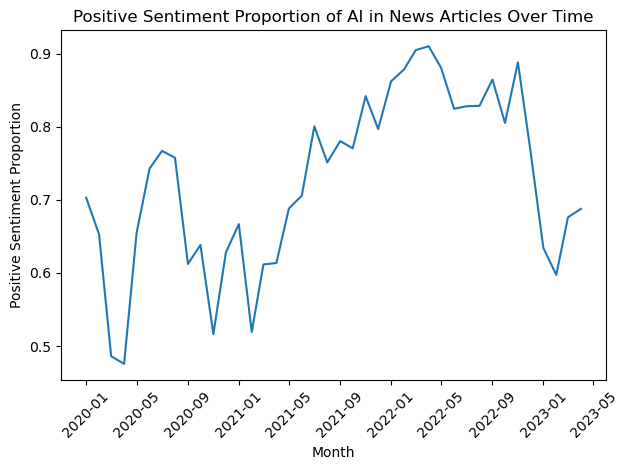

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])

df['year_month'] = df['date'].dt.to_period('M')
sentiment_by_month = df.groupby(['year_month', 'predicted_sentiment_yelp_new']).size().unstack()
positive_sentiment_by_month = sentiment_by_month['p'] / sentiment_by_month.sum(axis=1)

positive_sentiment_by_month.index = positive_sentiment_by_month.index.to_timestamp()

fig, ax = plt.subplots()
ax.plot(positive_sentiment_by_month.index, positive_sentiment_by_month.values)
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Positive Sentiment Proportion')
plt.title('Positive Sentiment Proportion of AI in News Articles Over Time')
plt.tight_layout()
plt.show()

##### BELOW calculates the average sentiment (mean()) for each year by grouping the DataFrame df by the 'year' column and taking the mean of the 'sentiment_numeric' column. It provides an average sentiment value for each year.

/var/folders/1q/cr3dj0m115vf89fcxv59dk7r0000gn/T/ipykernel_92871/146008259.py:21: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_rotation(45)


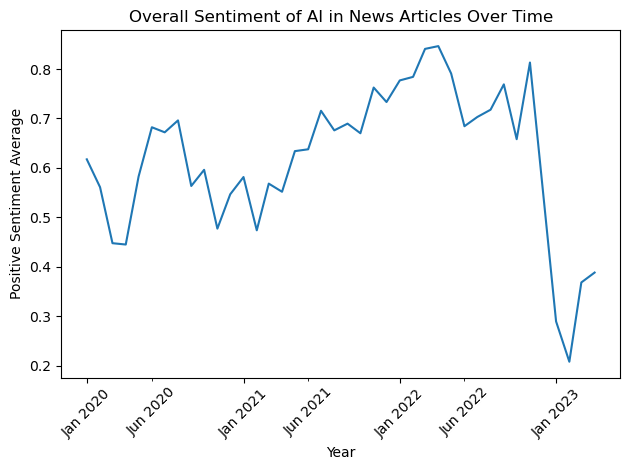

In [ ]:
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
sentiment_by_month = df.groupby(['year', 'month'])['sentiment_numeric'].mean()
sentiment_by_month.index = pd.to_datetime(sentiment_by_month.index.map(lambda x: f'{x[0]}-{x[1]}'))

fig, ax = plt.subplots()
ax.plot(sentiment_by_month.index, sentiment_by_month.values)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[1, 6]))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_rotation(45)

plt.xlabel('Year')
plt.ylabel('Positive Sentiment Average')
plt.title('Overall Sentiment of AI in News Articles Over Time')
plt.tight_layout()
plt.show()

### LDA for Each Sentiment

In [ ]:
#df.head()

In [ ]:
import nltk
from gensim import corpora
from gensim.models import LdaModel
from nltk.util import ngrams

In [ ]:
df['important_words'] = df['important_words'].str.lower()
df['tokens'] = df['important_words'].apply(nltk.word_tokenize)

In [ ]:
df['ngrams'] = df['tokens'].apply(lambda tokens: list(ngrams(tokens, 3)))

In [ ]:
df['ngrams'] = df['ngrams'].apply(lambda ngrams: [' '.join(gram) for gram in ngrams])

In [ ]:
positive_data = df[df['predicted_sentiment_yelp_new'] == 'p']['ngrams']
negative_data = df[df['predicted_sentiment_yelp_new'] == 'n']['ngrams']
neutral_data = df[df['predicted_sentiment_yelp_new'] == 'neu']['ngrams']

##### Positive Topics

In [ ]:
dictionary = corpora.Dictionary(positive_data)

In [ ]:
corpus = [dictionary.doc2bow(tokens) for tokens in positive_data]
num_topics = 5

In [ ]:
lda_model_positive = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

In [ ]:
for topic_id, topic_words in lda_model_positive.show_topics(num_topics=num_topics):
    print(f"Topic ID: {topic_id}")
    print(f"Keywords: {topic_words}")
    print()

Topic ID: 0
Keywords: 0.002*"opens new tab" + 0.001*"shares companys stock" + 0.001*"artificial intelligence technology" + 0.001*"may earn affiliate" + 0.001*"earn affiliate commission" + 0.001*"companys stock valued" + 0.001*"starfilled starfilled starfilled" + 0.001*"artificial intelligence ai" + 0.001*"search please enter" + 0.001*"please enter search"

Topic ID: 1
Keywords: 0.007*"artificial intelligence ai" + 0.001*"global artificial intelligence" + 0.001*"inbetathis beta experience" + 0.001*"sign inbetathis beta" + 0.000*"natural language processing" + 0.000*"using artificial intelligence" + 0.000*"facebook twitter linkedin" + 0.000*"ai cyber security" + 0.000*"intelligence ai cyber" + 0.000*"large language models"

Topic ID: 2
Keywords: 0.001*"car insurance quotes" + 0.001*"accurate real info" + 0.001*"agree terms use" + 0.001*"gdpr cookie consent" + 0.001*"set gdpr cookie" + 0.001*"cookie set gdpr" + 0.000*"user consent cookies" + 0.000*"consent cookies category" + 0.000*"kroge

Topic ID: 0 - Technology and Business:

Opens new tab
Shares company's stock
Artificial intelligence technology
Earn affiliate commission
Artificial intelligence AI
Search

Topic ID: 1 - Artificial Intelligence and Global Impact:

Artificial intelligence AI
Global artificial intelligence
In-beta experience
Sign in-beta
Natural language processing
Facebook, Twitter, LinkedIn
AI cyber security
Large language models

Topic ID: 2 - Online Services and Agreements:

Car insurance quotes
Accurate real info
Agree terms of use
GDPR cookie consent
Set GDPR cookie
User consent cookies

Topic ID: 3 - AI in Market Insights and News:

Matrix AI network
AI machine learning
Artificial intelligence AI
Natural language processing
Machine learning models
Breaking news alerts
Market insights

Topic ID: 4 - Decentralized Machine Learning and Trades:

Decentralized machine learning
Lower dollar trades
Lisk machine learning
WFMZTV 69 news
Higher dollar trades
Permission to edit article
Intended users located within European Economic Area


##### Negative Topics

In [ ]:
dictionary2 = corpora.Dictionary(negative_data)

In [ ]:
corpus2 = [dictionary2.doc2bow(tokens) for tokens in negative_data]
num_topics = 5

In [ ]:
lda_model_neg = LdaModel(corpus=corpus2, id2word=dictionary2, num_topics=num_topics, random_state=42)

In [ ]:
for topic_id, topic_words in lda_model_neg.show_topics(num_topics=num_topics):
    print(f"Topic ID: {topic_id}")
    print(f"Keywords: {topic_words}")
    print()

Topic ID: 0
Keywords: 0.000*"bing search engine" + 0.000*"enter search term" + 0.000*"argo ai autonomous" + 0.000*"internet search giants" + 0.000*"rolledout bot dubbed" + 0.000*"recently rolledout bot" + 0.000*"bard internet search" + 0.000*"bot dubbed bard" + 0.000*"dubbed bard internet" + 0.000*"broadcast rewritten redistributed"

Topic ID: 1
Keywords: 0.002*"password forgot password" + 0.001*"email log link" + 0.001*"email address email" + 0.001*"permission edit article" + 0.001*"recovery recover password" + 0.001*"recover password email" + 0.001*"password recovery recover" + 0.001*"logged switch accounts" + 0.001*"username password forgot" + 0.001*"facebook twitter whatsapp"

Topic ID: 2
Keywords: 0.002*"indicates user profile" + 0.002*"often indicates user" + 0.002*"icon icon shape" + 0.002*"shoulders often indicates" + 0.002*"shape persons head" + 0.002*"persons head shoulders" + 0.002*"head shoulders often" + 0.002*"account icon icon" + 0.002*"icon shape persons" + 0.001*"way c

Topic ID: 0 - Internet Search and Technology:

Bing search engine
Enter search term
Argo AI autonomous
Internet search giants
Recently rolled-out bot
Broadcast, rewritten, redistributed

Topic ID: 1 - Account and Login:

Password, forgot password
Email, log link
Email address
Permission to edit article
Recovery, recover password
Username, password, forgot
Facebook, Twitter, WhatsApp

Topic ID: 2 - User Profiles and Interaction:

Indicates user profile
Often indicates user
Icon, icon shape
Shoulders often indicate
Shape person's head
Account icon, icon shape
Way of close interaction

Topic ID: 3 - OpenAI and Technology:

Name, email, website
OpenAI logo seen
Front computer screen
Phone front computer
Mobile phone front
Broadcast, rewritten, redistributed

Topic ID: 4 - Entertainment and Media:

Videos, music, movies, visual art, TV series, books
Viral videos, performing arts, TV
News breaks, sign videos, music, visual art, TV
Books, literature, comics, theater
Dance behind viral videos, performing arts
Enter search term

In [ ]:
# neg_topic_labels = ['0', 'AI Search Engine, 'Topic 3', 'Topic 4', 'Topic 5', 'Media and Art']

##### Neutral Topics

In [ ]:
dictionary3 = corpora.Dictionary(neutral_data)

In [ ]:
corpus3 = [dictionary3.doc2bow(tokens) for tokens in neutral_data]
num_topics = 5

In [ ]:
lda_model_neutral = LdaModel(corpus=corpus3, id2word=dictionary3, num_topics=num_topics, random_state=42)

In [ ]:
for topic_id, topic_words in lda_model_neutral.show_topics(num_topics=num_topics):
    print(f"Topic ID: {topic_id}")
    print(f"Keywords: {topic_words}")
    print()

Topic ID: 0
Keywords: 0.004*"global artificial intelligence" + 0.002*"automotive artificial intelligence" + 0.002*"artificial intelligence software" + 0.002*"artificial intelligence market" + 0.002*"artificial intelligence ai" + 0.001*"intelligence software market" + 0.001*"market research report" + 0.001*"artificial intelligence robotics" + 0.001*"robotics aerospace defense" + 0.001*"intelligence robotics aerospace"

Topic ID: 1
Keywords: 0.002*"global artificial intelligence" + 0.001*"citizen services ai" + 0.001*"global machine learning" + 0.001*"xx usd million" + 0.001*"market research study" + 0.001*"reports per requirements" + 0.001*"artificial intelligence market" + 0.001*"per requirements clients" + 0.001*"customized reports per" + 0.001*"accuracy industries verticals"

Topic ID: 2
Keywords: 0.004*"artificial intelligence ai" + 0.003*"global artificial intelligence" + 0.002*"mobile artificial intelligence" + 0.001*"recognition ai camera" + 0.001*"ai drug discovery" + 0.001*"int

/var/folders/1q/cr3dj0m115vf89fcxv59dk7r0000gn/T/ipykernel_92871/3248395495.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


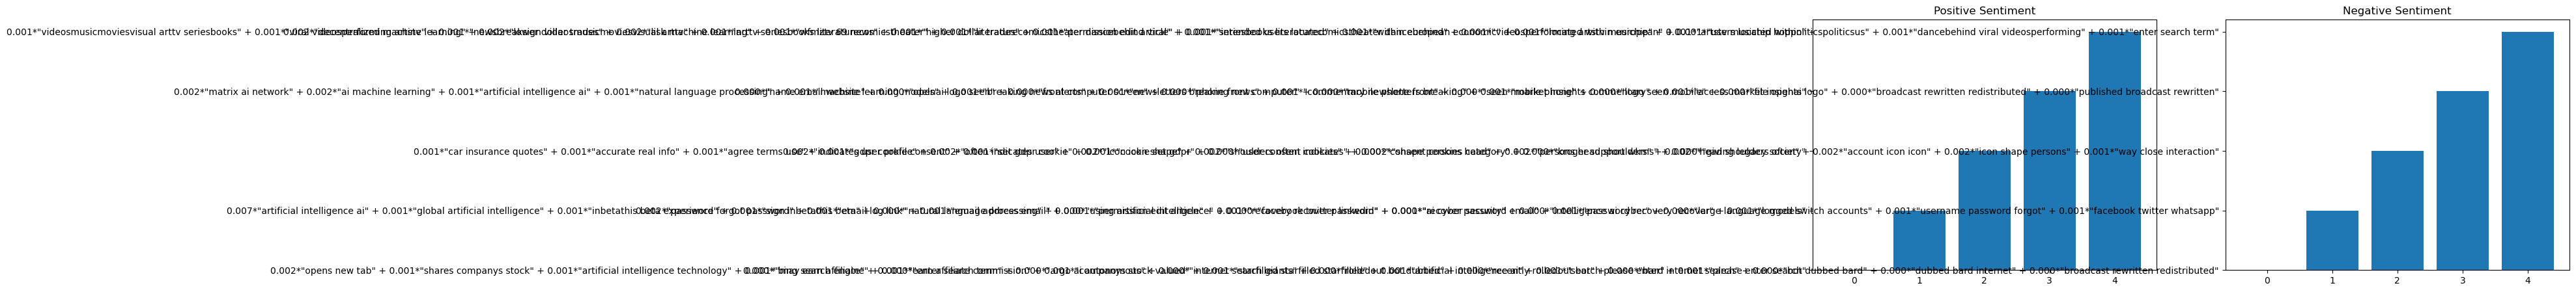

In [ ]:
import matplotlib.pyplot as plt

positive_topic_labels = ['Positive Topic 1', 'Positive Topic 2', 'Positive Topic 3']
negative_topic_labels = ['Negative Topic 1', 'Negative Topic 2', 'Negative Topic 3']

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Positive Sentiment
positive_topics = []
for topic_id, topic_words in lda_model_positive.show_topics(num_topics=num_topics):
    positive_topics.append(topic_words)
axs[0].bar(range(num_topics), positive_topics)
axs[0].set_title('Positive Sentiment')

# Negative Sentiment
negative_topics = []
for topic_id, topic_words in lda_model_neg.show_topics(num_topics=num_topics):
    negative_topics.append(topic_words)
axs[1].bar(range(num_topics), negative_topics)
axs[1].set_title('Negative Sentiment')

#fig.text(0.5, 0.04, 'Topic ID', ha='center')
#fig.text(0.04, 0.5, 'Keywords', va='center', rotation='vertical')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
positive_topic_counts = []
for topic_id in range(num_topics):
    count = sum(1 for doc_topics in lda_model_positive.get_document_topics(corpus) if doc_topics[0][0] == topic_id)
    positive_topic_counts.append(count)

In [ ]:
negative_topic_counts = []
for topic_id in range(num_topics):
    count = sum(1 for doc_topics in lda_model_neg.get_document_topics(corpus2) if doc_topics[0][0] == topic_id)
    negative_topic_counts.append(count)

/var/folders/1q/cr3dj0m115vf89fcxv59dk7r0000gn/T/ipykernel_92871/4088650582.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(positive_topic_labels, rotation=45)  # Set custom x-axis tick labels
/var/folders/1q/cr3dj0m115vf89fcxv59dk7r0000gn/T/ipykernel_92871/4088650582.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(neg_topic_labels, rotation=45)  # Set custom x-axis tick labels


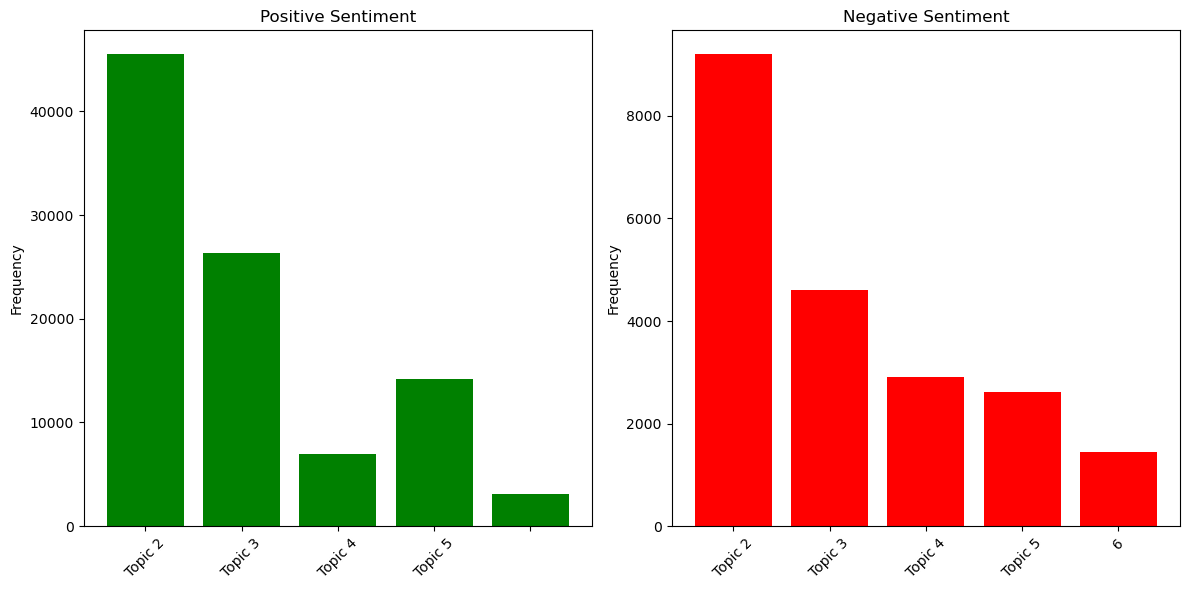

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Positive Sentiment
axs[0].bar(range(num_topics), positive_topic_counts, color='green')
axs[0].set_title('Positive Sentiment')
#axs[0].set_xlabel('Topic ID')
axs[0].set_ylabel('Frequency')

positive_topic_labels = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5']
axs[0].set_xticklabels(positive_topic_labels, rotation=45)  # Set custom x-axis tick labels

# Negative Sentiment
axs[1].bar(range(num_topics), negative_topic_counts, color='red')
axs[1].set_title('Negative Sentiment')
#axs[1].set_xlabel('Topic ID')
axs[1].set_ylabel('Frequency')

neg_topic_labels = ['0', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', '6']
axs[1].set_xticklabels(neg_topic_labels, rotation=45)  # Set custom x-axis tick labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df

,url,date,language,title,text,cleaned_text,important_words,tokens,topic,predicted_sentiment_yelp,predicted_sentiment_YELP2,new_sentiment_label,predicted_sentiment_yelp_new,year,sentiment_numeric,year_month,month,ngrams
0,http://en.people.cn/n3/2021/0318/c90000-9830122.html,2021-03-18,en,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,\n\nArtificial intelligence improves parking efficiency in Chinese cities - People's Daily Online\n\nHome\nChina Politics\nForeign Affairs\nOpinions\nVideo: We Are China\nBusiness\nMilitary\nWorld...,"Some urban areas of the city started to use ETC system for roadside parking spaces since July 1, 2019. As the city further deepens its roadside parking reform, the ETC system has almost covered al...",urban areas city started use etc system roadside parking spaces since july 1 2019 city deepens roadside parking reform etc system almost covered roadside parking spaces city proportion vehicles pa...,"[urban, areas, city, started, use, etc, system, roadside, parking, spaces, since, july, 1, 2019, city, deepens, roadside, parking, reform, etc, system, almost, covered, roadside, parking, spaces, ...",0,0,0,,p,2021,1,2021-03,3,"[urban areas city, areas city started, city started use, started use etc, use etc system, etc system roadside, system roadside parking, roadside parking spaces, parking spaces since, spaces since ..."
1,http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/,2020-02-27,en,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament,"\nChildren With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament\n \n\nSkip to content\n\t\t\tThursday, February 27, 2020\t\t\n\nLatest:\n\n\n...","Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament Thursday, February 27, 2020 Latest: Mansplaining in conferences: How can we get...",children autism saw learning social skills boosted playing ai robot news parliament thursday february 27 2020 latest mansplaining conferences get forestall learn noticed seven youngsters gentle av...,"[children, autism, saw, learning, social, skills, boosted, playing, ai, robot, news, parliament, thursday, february, 27, 2020, latest, mansplaining, conferences, get, forestall, learn, noticed, se...",1,0,0,,n,2020,-1,2020-02,2,"[children autism saw, autism saw learning, saw learning social, learning social skills, social skills boosted, skills boosted playing, boosted playing ai, playing ai robot, ai robot news, robot ne..."
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek","\n\nForget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek\nHome\nAbout us\nBack issues / E-book / PDF\nEMP Handbook\nSubscribe\...",The world entered a new era of accelerated transformation in the last eighteen months that will continue to evolve and press forward for years to come. Most businesses are playing catch-up trying ...,world entered new era accelerated transformation last eighteen months continue evolve press forward years come businesses playing catchup trying make sense new timeline ten years set aside careful...,"[world, entered, new, era, accelerated, transformation, last, eighteen, months, continue, evolve, press, forward, years, come, businesses, playing, catchup, trying, make, sense, new, timeline, ten...",0,0,0,,p,2021,1,2021-03,3,"[world entered new, entered new era, new era accelerated, era accelerated transformation, accelerated transformation last, transformation last eighteen, last eighteen months, eighteen months conti..."
3,http://www.homeoffice.consumerelectronicsnet.com/strategy-analytics-71-of

In [ ]:
df2 = df.drop(['ngrams', 'month', 'year_month', 'year', 'new_sentiment_label',
               'predicted_sentiment_YELP2', 'predicted_sentiment_yelp'], axis=1)

In [ ]:
#df2

In [ ]:
topic_sentiment_df = df[['topic', 'sentiment_numeric']]
topic_counts = topic_sentiment_df['topic'].value_counts()
average_sentiment = topic_sentiment_df.groupby('topic')['sentiment_numeric'].mean()
sentiment_counts = topic_sentiment_df['sentiment_numeric'].value_counts()

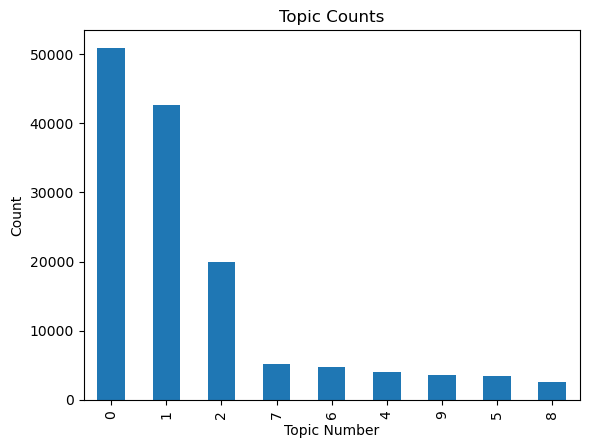

In [ ]:
topic_counts.plot(kind='bar')
plt.xlabel('Topic Number')
plt.ylabel('Count')
plt.title('Topic Counts')
plt.show()

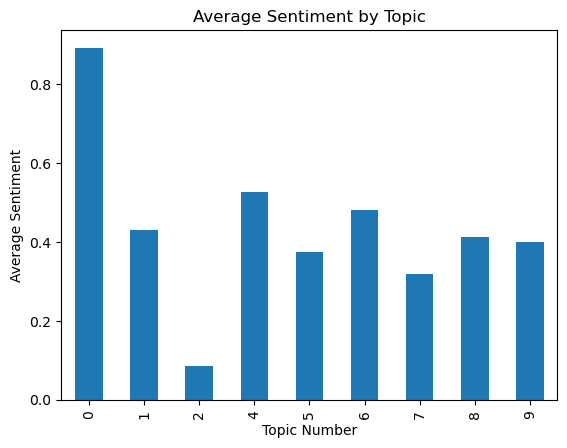

In [ ]:
average_sentiment.plot(kind='bar')
plt.xlabel('Topic Number')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Topic')
plt.show()

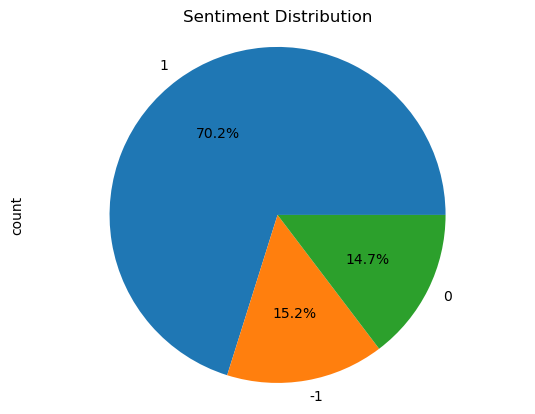

In [ ]:
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

In [ ]:
df2.to_parquet('sentiment_filtered_news.parquet')